In [1]:
import os
os.chdir('modules')

Length of vocab: 429
Number of epochs = 25, Loss=1.951
Accuracy on dev set=0.435
Length of vocab: 525
Number of epochs = 25, Loss=2.947
Accuracy on dev set=0.61
Length of vocab: 620
Number of epochs = 25, Loss=3.425
Accuracy on dev set=0.67
Length of vocab: 690
Number of epochs = 25, Loss=3.654
Accuracy on dev set=0.669
Length of vocab: 756
Number of epochs = 25, Loss=3.797
Accuracy on dev set=0.677
Length of vocab: 824
Number of epochs = 25, Loss=3.933
Accuracy on dev set=0.675
Length of vocab: 900
Number of epochs = 25, Loss=5.392
Accuracy on dev set=0.642
Length of vocab: 975
Number of epochs = 25, Loss=6.189
Accuracy on dev set=0.646
Length of vocab: 1019
Number of epochs = 25, Loss=7.299
Accuracy on dev set=0.707
Length of vocab: 1065
Number of epochs = 25, Loss=6.409
Accuracy on dev set=0.622
Length of vocab: 1133
Number of epochs = 25, Loss=6.838
Accuracy on dev set=0.691


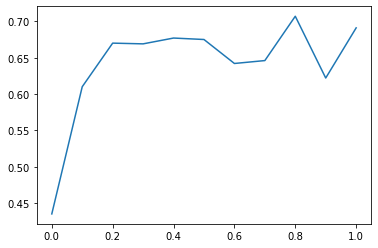

In [3]:
from train import train, score
from get_data import get_data
from model import LangID
from get_gpt_reviews import get_gpt_reviews
import matplotlib.pyplot as plt

X_all, Y_all = get_data("gpt_2000")
base_len = len(get_data("n_2000")) # Should be 2000 in the end
new_len = len(X_all) - base_len

ps, scores = [], []
for i in range(0, 101, 10):
    p = i/100
    data_size = int(base_len + p*new_len - 1) # exclusive to avoid indexing [-1:]
    X = X_all[-data_size:] # Go from back, so we always get base data
    Y = Y_all[-data_size:]

    model, vocab = train(X, Y, epochs=25, embed_dim=100, lstm_dim=100, batch_size=512)
    Xt, Yt = get_data("dev")
    scores.append(score(model, vocab, Xt, Yt))
    ps.append(p)
plt.plot(ps, scores)

In [12]:
from collections import defaultdict
import numpy as np
import pandas as pd
import json
import torch
import torch.nn as nn
import torch.optim as optim
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class OnehotTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def convert(self, sentence):# [[w1, w2, w3], [w1, w2, w3]]
        output = [0]*len(self.vocab)
        for word in sentence.split():
            word = word.lower()
            if word in self.vocab:
                output[self.vocab[word]] = 1
        return output

    def fit(self, X, y=None):
        vectorizer = TfidfVectorizer(min_df = 25)
        vectorizer.fit(X)
        self.vocab = vectorizer.vocabulary_
        return self
    
    def transform(self, X, y=None):
        X_ = [self.convert(row) for row in X]
        return X_






Pipeline(steps=[('onehot', OnehotTransformer()),
                ('clf', LogisticRegression(max_iter=1000))])

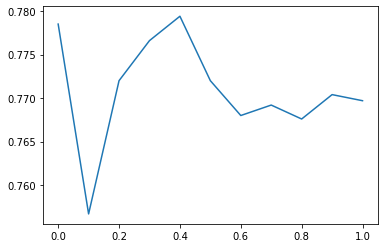

In [16]:
ps, scores = [], []
for i in range(0, 101, 10):
    p = i/100
    data_size = int(base_len + p*new_len - 1) # exclusive to avoid indexing [-1:]
    X = X_all[-data_size:] # Go from back, so we always get base data
    Y = Y_all[-data_size:]

    pipe = Pipeline([
        ('onehot', OnehotTransformer()),
        ('clf', LogisticRegression(max_iter=1000))
    ])
    pipe.fit(X, Y)
    
    scores.append(pipe.score(Xt, Yt))
    ps.append(p)
plt.plot(ps, scores)